# Genetic Algorithm Portfolio Optimization

## Dependencies Set-up

In [44]:
# --- Import Required Libraries ---
import os
import sys
import matplotlib.pyplot as plt

# --- Set Up Paths ---
ROOT_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_PATH not in sys.path:
    sys.path.insert(0, ROOT_PATH)
    
# --- Import Custom Libraries ---
from pop.runner import runner
from pop.util.print_results import print_results
from pop.util.file_saver import prepare_file_saving, save_results, save_fitness_history, save_diversity_history, get_project_root, get_results_path

ImportError: cannot import name 'get_project_root' from 'pop.util.file_saver' (c:\Users\lara\BAO_Portfolio-Optimization-Problem\pop\util\file_saver.py)

## Parameters Definition

In [20]:
# --- Define Experiment Parameters ---
# Algorithm type: 'ga' (Genetic Algorithm) or 'pso' (Particle Swarm Optimization)
algorithm_type = "pso"

# Dataset folder name
dataset_folder_name = "../dataset"

# Number of companies to include in the portfolio
num_companies = 100

# Annual risk-free rate
risk_free_rate_annual = 0.042

# Analysis period
start_date = "2015-01-01"
end_date = "2020-01-01"

# Correlation level (optional): 'low', 'medium', 'high', or None
correlation_level = 'high'

# Random seed for reproducibility
seed = 5

## Hyperparameter & Model Configuration

In [22]:
# --- Algorithm-Specific Parameters ---
# GA Parameters
ga_params = {
    "pop_size": 100,
    "max_generations": 300,
    "mutation_rate": 0.1,
    "gaussian_stdev": 0.1,
    "num_elites": 1,
    "tournament_size": 3,
}

# PSO Parameters
pso_params = {
    "swarm_size": 100,
    "max_iterations": 300,
    "w": 0.5,
    "c1": 1.0,
    "c2": 2.0,
}

# Repair method for constraint handling: 'normalize', 'clip', 'restart', 'shrink'
repair_method = "normalize"

## Experiment Execution

In [23]:
# --- Execute Experiment ---
if algorithm_type == "ga":
    params = ga_params
elif algorithm_type == "pso":
    params = pso_params
else:
    raise ValueError("Invalid algorithm type. Choose 'ga' or 'pso'.")

# Run the experiment
(results, fitness_history, diversity_history) = runner(
    algorithm_type=algorithm_type,
    dataset_folder_name=dataset_folder_name,
    num_companies=num_companies,
    risk_free_rate_annual=risk_free_rate_annual,
    start_date=start_date,
    end_date=end_date,
    correlation_level=correlation_level,
    seed=seed,
    repair_method=repair_method,
    **params
)

# --- Display Results ---
sharpe_ratio, annual_return, weights = results
print_results(sharpe_ratio, annual_return, weights)


                         PORTFOLIO OPTIMIZATION RESULTS

Sharpe Ratio: 0.8329931092755731
Annual Return: 17.176746352700068 (1717.6746352700068%)

Portfolio Distribution:
--------------------------------------------------------------------------------
Company                                           Weight      Percentage
--------------------------------------------------------------------------------
Equity Lifestyle Properties, Inc. Common Sto...     0.1000          10.00%
Leidos Holdings, Inc. Common Stock                0.1000          10.00%
Advanced Micro Devices, Inc. - Common Stock       0.0999           9.99%
Mid-Southern Bancorp, Inc. - Common Stock         0.0996           9.96%
Advanced Energy Industries, Inc. - Common St...     0.0937           9.37%
Federal Agricultural Mortgage Corporation Co...     0.0922           9.22%
Trane Technologies plc                            0.0863           8.63%
Golden Entertainment, Inc. - Common Stock         0.0812           8.12%
Apo

In [5]:
# --- Save Results ---
# Prepare file saving
params = ga_params if algorithm_type == "ga" else pso_params
results_dir, filename = prepare_file_saving(
    algorithm_type=algorithm_type,
    correlation_level=correlation_level,
    params=params,
    root_path=os.path.join(ROOT_PATH, "experiments", "results")
)

# Save results
save_results(results_dir, filename, weights, sharpe_ratio, annual_return)

Results saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_results.csv


In [6]:
# Save fitness history
save_fitness_history(results_dir, filename, fitness_history)

Fitness history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness.csv


In [7]:
# Save diversity history
save_diversity_history(results_dir, filename, diversity_history)

Diversity history saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity.csv


## Visualize fitness evolution

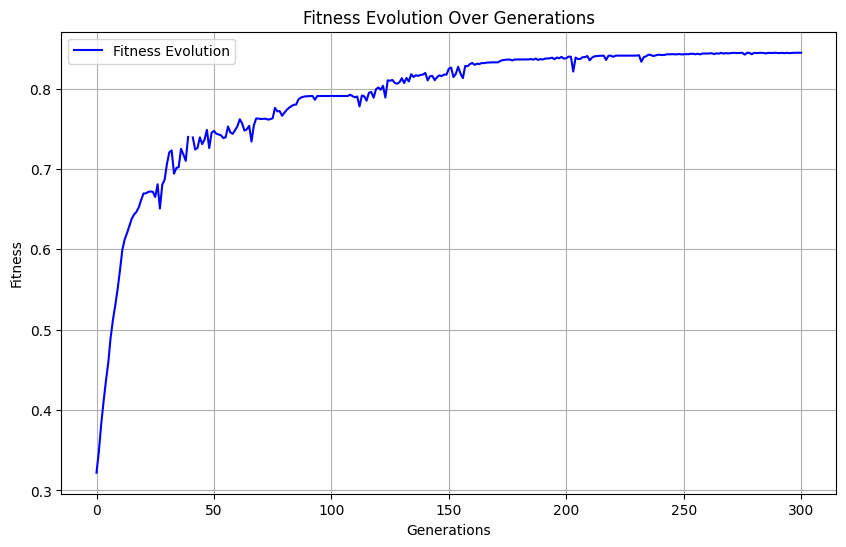

In [8]:
# ---Plotting Fitness Evolution---
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

In [9]:
# --- Save Fitness Evolution Plot ---
fitness_plot_path = os.path.join(results_dir, f"{filename}_fitness_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, label="Fitness Evolution", color="blue")
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.savefig(fitness_plot_path)
plt.clf()
print(f"Fitness evolution plot saved to {fitness_plot_path}")

Fitness evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_fitness_evolution.png


<Figure size 1000x600 with 0 Axes>

## Visualize diversity evolution

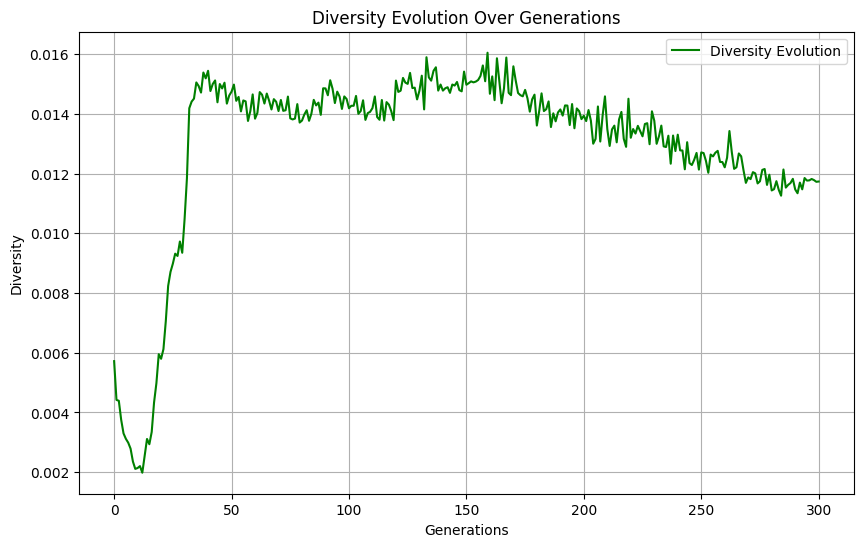

In [10]:
# --- Plot Diversity Evolution ---
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.show()

In [11]:
# --- Save Diversity Evolution Plot ---
diversity_plot_path = os.path.join(results_dir, f"{filename}_diversity_evolution.png")
plt.figure(figsize=(10, 6))
plt.plot(diversity_history, label="Diversity Evolution", color="green")
plt.title("Diversity Evolution Over Generations")
plt.xlabel("Generations")
plt.ylabel("Diversity")
plt.legend()
plt.grid()
plt.savefig(diversity_plot_path)
plt.clf()
print(f"Diversity evolution plot saved to {diversity_plot_path}")

Diversity evolution plot saved to c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\exp_H_ss-100_mi-300_w-0.5_diversity_evolution.png


<Figure size 1000x600 with 0 Axes>

-----

## Fine Tuning

In [ ]:
from itertools import product
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [ ]:
# Get the absolute path to the project root
def get_project_root():
    current_dir = os.getcwd()
    while True:
        if os.path.basename(current_dir) == "BAO_Portfolio-Optimization-Problem":
            return current_dir
        parent_dir = os.path.dirname(current_dir)
        if parent_dir == current_dir:
            raise FileNotFoundError("Project root 'BAO_Portfolio-Optimization-Problem' not found.")
        current_dir = parent_dir

# Construct the path for the results folder
def get_results_path(filename, algorithm=None):
    project_root = get_project_root()
    if algorithm:
        return os.path.join(project_root, "experiments", "results", algorithm, filename)
    return os.path.join(project_root, "experiments", "results", filename)

Fine-tuning: Run all combinations of configurations for both algorithms and each repair method 5 times

In [36]:
# Number of runs for statistically significant results
NUM_RUNS = 5

# Inherit globally defined variables
DATASET = dataset_folder_name
NUM_COMPANIES = num_companies
RISK_FREE_RATE = risk_free_rate_annual
START_DATE = start_date
END_DATE = end_date

# Hyperparameters for Genetic Algorithm (GA)
ga_param_grid = {
    "pop_size": [20, 50, 100],
    "mutation_rate": [0.01, 0.05, 0.1], # 1 divided by no of companies, then higher and lower
    "gaussian_stdev": [0.01, 0.05, 0.1],
    "num_elites": [1, 2, 5],
    "max_generations": [50, 100]
}

# Hyperparameters for Particle Swarm Optimization (PSO)
pso_param_grid = {
    "swarm_size": [20, 50, 100],
    "max_iterations": [50, 100],
    "w": [0.4, 0.7, 0.9],
    "c1": [1.0, 1.5, 2.0],
    "c2": [1.0, 1.5, 2.0]
}

# Possible repair methods
REPAIR_METHODS = ["normalize", "clip", "restart", "shrink"]

# Helper function to create parameter combinations
def get_param_combinations(param_grid):
    keys, values = zip(*param_grid.items())
    return [dict(zip(keys, combo)) for combo in product(*values)]

# Check if the configuration is already completed
def check_existing_results(results_dir, base_filename):
    completed_runs = 0
    for run_id in range(1, NUM_RUNS + 1):
        run_filename = os.path.join(results_dir, f"{base_filename}_run{run_id}_results.csv")
        if os.path.isfile(run_filename):
            completed_runs += 1
    return completed_runs

# Function to evaluate a specific configuration
def evaluate_config(algorithm_type, config, repair_method):
    scores, times, returns, generations = [], [], [], []

    # Prepare file saving
    results_dir, base_filename = prepare_file_saving(
        algorithm_type=algorithm_type,
        correlation_level=correlation_level,
        params=config,
        root_path=os.path.join(os.pardir, "experiments", "results")
    )

    # Check for existing runs
    completed_runs = check_existing_results(results_dir, base_filename)
    if completed_runs >= NUM_RUNS:
        print(f"⚠️ Configuration already completed: {base_filename} (Runs: {completed_runs}/{NUM_RUNS})")
        return None

    for run_id in range(1, NUM_RUNS + 1):
        start = time.time()
        try:
            # Run the experiment
            results, fitness_history, diversity_history = runner(
                algorithm_type=algorithm_type,
                dataset_folder_name=DATASET,
                num_companies=NUM_COMPANIES,
                risk_free_rate_annual=RISK_FREE_RATE,
                start_date=START_DATE,
                end_date=END_DATE,
                correlation_level=correlation_level,
                seed=seed + run_id,
                repair_method=repair_method,
                **config
            )

            # Unpack the results
            sharpe_ratio, annual_return, weights = results
            runtime = time.time() - start
            num_generations = len(fitness_history)

            # Log results
            scores.append(sharpe_ratio)
            returns.append(annual_return)
            times.append(runtime)
            generations.append(num_generations)

            # Save intermediate run results
            run_filename = f"{base_filename}_run{run_id}"
            save_results(results_dir, run_filename, weights, sharpe_ratio, annual_return)
            save_fitness_history(results_dir, run_filename, fitness_history)
            save_diversity_history(results_dir, run_filename, diversity_history)

            print(f"✅ Run {run_id}/{NUM_RUNS} completed for {algorithm_type} - {config}")

        except Exception as e:
            print(f"Error during evaluation of {algorithm_type} with config {config}: {e}")

    # Aggregate results after all runs are completed
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    mean_return = np.mean(returns)
    mean_time = np.mean(times)
    mean_generations = np.mean(generations)

    # Save the aggregated results just once
    aggregated_filename = f"{base_filename}_aggregated"
    print(f"Aggregated results for {algorithm_type} - {config}: Sharpe {mean_score:.4f}, Return {mean_return:.4f}")
    save_results(results_dir, aggregated_filename, weights, mean_score, mean_return)
    save_fitness_history(results_dir, aggregated_filename, fitness_history)
    save_diversity_history(results_dir, aggregated_filename, diversity_history)

    return mean_score, std_score, mean_return, mean_time, mean_generations, config

# Fine-tuning process for both GA and PSO algorithms
def fine_tune_algorithms():
    results = []

    for algo_type, param_grid in [("GA", ga_param_grid), ("PSO", pso_param_grid)]:
        print(f"Starting fine-tuning for {algo_type}...")
        for repair in REPAIR_METHODS:
            for config in get_param_combinations(param_grid):
                print(f"Testing {algo_type} with config: {config} + repair method: {repair}")
                result = evaluate_config(algo_type.lower(), config, repair)
                if result is not None:
                    mean_score, std_score, mean_return, mean_time, mean_generations, used_config = result
                    results.append({
                        "algorithm": algo_type,
                        "repair_method": repair,
                        "mean_sharpe": mean_score,
                        "std_sharpe": std_score,
                        "mean_return": mean_return,
                        "mean_time": mean_time,
                        "mean_generations": mean_generations,
                        **used_config
                    })

    # Save fine-tuning results to algorithm-specific directory
    for algo_type in ["GA", "PSO"]:
        algo_results = [r for r in results if r['algorithm'] == algo_type]
        df = pd.DataFrame(algo_results)
        result_path = get_results_path("fine_tuning_results.csv", algo_type.lower())
        os.makedirs(os.path.dirname(result_path), exist_ok=True)
        df.to_csv(result_path, index=False)
        print(f"✅ Fine-tuning results for {algo_type} saved to '{result_path}'")

    return results

# Execute fine-tuning
fine_tuning_results = fine_tune_algorithms()


Starting fine-tuning for GA...
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.01, 'gaussian_stdev': 0.01, 'num_elites': 1, 'max_generations': 50} + repair method: normalize
⚠️ Configuration already completed: exp_H_ps-20_mg-50_mr-0.01 (Runs: 5/5)
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.01, 'gaussian_stdev': 0.01, 'num_elites': 1, 'max_generations': 100} + repair method: normalize
⚠️ Configuration already completed: exp_H_ps-20_mg-100_mr-0.01 (Runs: 5/5)
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.01, 'gaussian_stdev': 0.01, 'num_elites': 2, 'max_generations': 50} + repair method: normalize
⚠️ Configuration already completed: exp_H_ps-20_mg-50_mr-0.01 (Runs: 5/5)
Testing GA with config: {'pop_size': 20, 'mutation_rate': 0.01, 'gaussian_stdev': 0.01, 'num_elites': 2, 'max_generations': 100} + repair method: normalize
⚠️ Configuration already completed: exp_H_ps-20_mg-100_mr-0.01 (Runs: 5/5)
Testing GA with config: {'pop_size': 20, 'mutatio

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Aggregated results for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.4, 'c1': 1.0, 'c2': 1.0}: Sharpe -inf, Return 11.3953
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.4_aggregated_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.4_aggregated_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.4_aggregated_diversity.csv
Testing PSO with config: {'swarm_size': 20, 'max_iterations': 50, 'w': 0.4, 'c1': 1.0, 'c2': 1.5} + repair method: normalize
⚠️ Configuration already completed: exp_H_ss-20_mi-50_w-0.4 (Runs: 5/5)
Testing PSO with config: {'swarm_size': 20, 'max_iterations': 50, 'w': 0.4, 'c1': 1.0, 'c2': 2.0} + repair method: normalize
⚠️ Configuration already completed: exp_H_ss-20_mi-50_w-0.4 (Runs: 5/5)
Testing PSO with config: {'swarm_size': 20, 'max_iterations': 50, 'w': 0.4, 'c1': 1.5, 'c2': 1.0} + repair method: normalize
⚠️ Configuration already completed: exp_H_ss-20_mi-50_w-0

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run1_diversity.csv
✅ Run 1/5 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.9, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run2_diversity.csv
✅ Run 2/5 completed for pso - {'swarm_size': 20, 'max_iterations': 50, 'w': 0.9, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-50_w-0.9_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run1_diversity.csv
✅ Run 1/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.4, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run2_diversity.csv
✅ Run 2/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.4, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.4_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\ex

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run1_diversity.csv
✅ Run 1/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.7, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run2_diversity.csv
✅ Run 2/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.7, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.7_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\ex

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run1_diversity.csv
✅ Run 1/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.9, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run2_diversity.csv
✅ Run 2/5 completed for pso - {'swarm_size': 20, 'max_iterations': 100, 'w': 0.9, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-20_mi-100_w-0.9_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\ex

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Results saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run1_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run1_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run1_diversity.csv
✅ Run 1/5 completed for pso - {'swarm_size': 50, 'max_iterations': 50, 'w': 0.4, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run2_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run2_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run2_diversity.csv
✅ Run 2/5 completed for pso - {'swarm_size': 50, 'max_iterations': 50, 'w': 0.4, 'c1': 1.0, 'c2': 1.0}
Results saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run3_results.csv
Fitness history saved to ..\experiments\results\pso\exp_H_ss-50_mi-50_w-0.4_run3_fitness.csv
Diversity history saved to ..\experiments\results\pso\exp_H_ss-50_

Select per algorithm best, median and worst configuration

In [55]:
# Number of runs for statistically significant results
NUM_RUNS = 31

# Aggregate fitness and diversity history across runs
def aggregate_history(history_list):
    history_array = np.array(history_list)
    mean_history = np.mean(history_array, axis=0)
    std_history = np.std(history_array, axis=0)
    return mean_history, std_history

# Save aggregated fitness and diversity history
def save_aggregated_history(results_dir, filename, mean_history, std_history, metric):
    aggregated_file = os.path.join(results_dir, f"{filename}_aggregated_{metric}.csv")
    aggregated_df = pd.DataFrame({
        "Generation": range(len(mean_history)),
        f"Mean {metric.capitalize()}": mean_history,
        f"Std {metric.capitalize()}": std_history
    })
    aggregated_df.to_csv(aggregated_file, index=False)
    print(f"✅ Aggregated {metric} history saved to {aggregated_file}")

# Load fine-tuning results from both algorithm files (GA and PSO)
def load_fine_tuning_results():
    ga_file_path = get_results_path("fine_tuning_results.csv", "ga")
    pso_file_path = get_results_path("fine_tuning_results.csv", "pso")
    try:
        print(f"🔍 Loading GA results from: {ga_file_path}")
        ga_results = pd.read_csv(ga_file_path)
    except FileNotFoundError:
        print(f"⚠️ GA fine-tuning results not found at {ga_file_path}.")
        ga_results = None

    try:
        print(f"🔍 Loading PSO results from: {pso_file_path}")
        pso_results = pd.read_csv(pso_file_path)
    except FileNotFoundError:
        print(f"⚠️ PSO fine-tuning results not found at {pso_file_path}.")
        pso_results = None

    if ga_results is not None and pso_results is not None:
        combined_results = pd.concat([ga_results, pso_results], ignore_index=True)
        print("✅ Combined GA and PSO results loaded successfully.")
        return combined_results
    elif ga_results is not None:
        print("✅ Only GA results loaded successfully.")
        return ga_results
    elif pso_results is not None:
        print("✅ Only PSO results loaded successfully.")
        return pso_results
    else:
        print("⚠️ No fine-tuning results found for either algorithm.")
        return None

# Function to find the best, median, and worst configurations
def select_configs(df, algorithm):
    df_algo = df[df["algorithm"] == algorithm]

    # Sort the dataframe by mean_sharpe in descending order for clarity
    df_algo = df_algo.sort_values(by="mean_sharpe", ascending=False).reset_index(drop=True)

    # Select best, median, and worst configurations
    best_config = df_algo.iloc[0].copy()
    median_config = df_algo.iloc[len(df_algo) // 2].copy()
    worst_config = df_algo.iloc[-1].copy()

    # Add the quality attribute to each configuration
    best_config["quality"] = "best"
    median_config["quality"] = "median"
    worst_config["quality"] = "worst"

    return best_config, median_config, worst_config

# Run a configuration using the actual experiment runner
def run_configuration(algorithm, config, num_runs=31):
    results = []
    fitness_histories = []
    diversity_histories = []

    for run_id in range(1, num_runs + 1):
        try:
            # Prepare the parameters for the runner
            runner_params = config.to_dict()

            # Ensure integer parameters are properly cast
            int_params = ["pop_size", "num_elites", "max_generations", "swarm_size", "max_iterations"]
            for param in int_params:
                if param in runner_params and not pd.isna(runner_params[param]):
                    runner_params[param] = int(runner_params[param])
            
            # Check if 'repair_method' exists and remove it before passing as kwargs
            if "repair_method" in runner_params:
                del runner_params["repair_method"]

            # Run the experiment
            start = time.time()
            run_output, fitness_history, diversity_history = runner(
                algorithm_type=algorithm.lower(),
                dataset_folder_name=DATASET,
                num_companies=NUM_COMPANIES,
                risk_free_rate_annual=RISK_FREE_RATE,
                start_date=START_DATE,
                end_date=END_DATE,
                correlation_level=correlation_level,
                seed=seed + run_id,
                repair_method=config["repair_method"],
                **runner_params
            )

            sharpe_ratio, annual_return, weights = run_output
            runtime = time.time() - start

            # Append run result
            results.append({
                "algorithm": algorithm,
                "quality": config["quality"],
                "run_id": run_id,
                "sharpe_ratio": sharpe_ratio,
                "annual_return": annual_return,
                "runtime": runtime,
                **config.to_dict()
            })

            # Collect fitness and diversity for aggregation
            fitness_histories.append(fitness_history)
            diversity_histories.append(diversity_history)

            print(f"✅ Run {run_id}/{num_runs} completed for {algorithm} - {config['quality']}")

        except Exception as e:
            print(f"❌ Error during run {run_id} of {algorithm} - {config['quality']}: {e}")

    # Aggregate fitness and diversity history
    mean_fitness, std_fitness = aggregate_history(fitness_histories)
    mean_diversity, std_diversity = aggregate_history(diversity_histories)

    # Save aggregated history
    results_dir = get_results_path(f"{algorithm.lower()}/{config['quality']}")
    os.makedirs(results_dir, exist_ok=True)
    filename = f"aggregated_{config['quality']}"
    save_aggregated_history(results_dir, filename, mean_fitness, std_fitness, "fitness")
    save_aggregated_history(results_dir, filename, mean_diversity, std_diversity, "diversity")

    # Return the collected results as a DataFrame
    return pd.DataFrame(results)

# Run all selected configurations for 31 runs and save the results
def run_selected_configs():
    fine_tuning_results = load_fine_tuning_results()
    if fine_tuning_results is None:
        print("⚠️ No fine-tuning results to process.")
        return

    all_results = []

    for algo in ["GA", "PSO"]:
        best, median, worst = select_configs(fine_tuning_results, algo)

        # Run the best, median, and worst configurations
        for config in [best, median, worst]:
            print(f"🚀 Running {algo} - {config['quality']} configuration...")
            result_df = run_configuration(algo, config, num_runs=31)
            all_results.append(result_df)

    # Concatenate all result DataFrames into one
    final_results_df = pd.concat(all_results, ignore_index=True)

    # Save the final aggregated results
    result_path = get_results_path("final_fine_tuning_results.csv")
    final_results_df.to_csv(result_path, index=False)
    print(f"✅ Final fine-tuning results saved to '{result_path}'")

# Execute the fine-tuning for selected configurations
run_selected_configs()

🔍 Loading GA results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\ga\fine_tuning_results.csv
🔍 Loading PSO results from: c:\Users\lara\BAO_Portfolio-Optimization-Problem\experiments\results\pso\fine_tuning_results.csv
✅ Combined GA and PSO results loaded successfully.
🚀 Running GA - best configuration...
✅ Run 1/31 completed for GA - best
✅ Run 2/31 completed for GA - best
✅ Run 3/31 completed for GA - best
✅ Run 4/31 completed for GA - best
✅ Run 5/31 completed for GA - best
✅ Run 6/31 completed for GA - best
✅ Run 7/31 completed for GA - best
✅ Run 8/31 completed for GA - best
✅ Run 9/31 completed for GA - best
✅ Run 10/31 completed for GA - best
✅ Run 11/31 completed for GA - best
✅ Run 12/31 completed for GA - best
✅ Run 13/31 completed for GA - best
✅ Run 14/31 completed for GA - best
✅ Run 15/31 completed for GA - best
✅ Run 16/31 completed for GA - best
✅ Run 17/31 completed for GA - best
✅ Run 18/31 completed for GA - best
✅ Run 19/31 completed for

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


✅ Run 1/31 completed for PSO - median
✅ Run 2/31 completed for PSO - median
✅ Run 3/31 completed for PSO - median
✅ Run 4/31 completed for PSO - median
✅ Run 5/31 completed for PSO - median
✅ Run 6/31 completed for PSO - median
✅ Run 7/31 completed for PSO - median
✅ Run 8/31 completed for PSO - median
✅ Run 9/31 completed for PSO - median
✅ Run 10/31 completed for PSO - median
✅ Run 11/31 completed for PSO - median
✅ Run 12/31 completed for PSO - median
✅ Run 13/31 completed for PSO - median
✅ Run 14/31 completed for PSO - median
✅ Run 15/31 completed for PSO - median
✅ Run 16/31 completed for PSO - median
✅ Run 17/31 completed for PSO - median
✅ Run 18/31 completed for PSO - median
✅ Run 19/31 completed for PSO - median
✅ Run 20/31 completed for PSO - median
✅ Run 21/31 completed for PSO - median
✅ Run 22/31 completed for PSO - median
✅ Run 23/31 completed for PSO - median
✅ Run 24/31 completed for PSO - median
✅ Run 25/31 completed for PSO - median
✅ Run 26/31 completed for PSO - me

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


✅ Run 1/31 completed for PSO - worst
✅ Run 2/31 completed for PSO - worst
✅ Run 3/31 completed for PSO - worst
✅ Run 4/31 completed for PSO - worst
✅ Run 5/31 completed for PSO - worst
✅ Run 6/31 completed for PSO - worst
✅ Run 7/31 completed for PSO - worst
✅ Run 8/31 completed for PSO - worst
✅ Run 9/31 completed for PSO - worst
✅ Run 10/31 completed for PSO - worst
✅ Run 11/31 completed for PSO - worst
✅ Run 12/31 completed for PSO - worst
✅ Run 13/31 completed for PSO - worst
✅ Run 14/31 completed for PSO - worst
✅ Run 15/31 completed for PSO - worst
✅ Run 16/31 completed for PSO - worst
✅ Run 17/31 completed for PSO - worst
✅ Run 18/31 completed for PSO - worst
✅ Run 19/31 completed for PSO - worst
✅ Run 20/31 completed for PSO - worst
✅ Run 21/31 completed for PSO - worst
✅ Run 22/31 completed for PSO - worst
✅ Run 23/31 completed for PSO - worst
✅ Run 24/31 completed for PSO - worst
✅ Run 25/31 completed for PSO - worst
✅ Run 26/31 completed for PSO - worst
✅ Run 27/31 completed

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Print out the results for each combination

In [56]:
# Set the path to the final aggregated results
result_path = "c:/Users/lara/BAO_Portfolio-Optimization-Problem/experiments/results/final_fine_tuning_results.csv"

# Load the aggregated results
try:
    final_results_df = pd.read_csv(result_path)
    print(f"✅ Final fine-tuning results loaded from '{result_path}'")
except FileNotFoundError:
    print(f"⚠️ Could not find the aggregated results file at '{result_path}'")

# Display the entire DataFrame
print("\n🔍 Complete Final Results:")
print(final_results_df)

# Print a concise summary of configurations and results
def print_configuration_summary(data, algorithm, quality):
    filtered_data = data[(data["algorithm"] == algorithm) & (data["quality"] == quality)]
    if filtered_data.empty:
        print(f"\n⚠️ No results found for {algorithm} - {quality}")
        return

    print(f"\n📊 {algorithm} - {quality.capitalize()} Configuration Summary:")
    config = filtered_data.iloc[0]
    print(f"  Mean Sharpe Ratio: {config['sharpe_ratio']:.4f}")
    print(f"  Mean Return: {config['annual_return']:.4f}")
    print(f"  Mean Time: {config['runtime']:.4f} seconds")
    print(f"  Repair Method: {config['repair_method']}")
    print("  Hyperparameters:")
    hyperparameters = [
        "pop_size", "mutation_rate", "gaussian_stdev", "num_elites", "max_generations",
        "swarm_size", "max_iterations", "w", "c1", "c2"
    ]
    for param in hyperparameters:
        if param in config and pd.notna(config[param]):
            print(f"    {param}: {config[param]}")
    print("-" * 50)

# Print summaries for all combinations of algorithm and configuration quality
for algo in ["GA", "PSO"]:
    for quality in ["best", "median", "worst"]:
        print_configuration_summary(final_results_df, algo, quality)

# Print out basic statistics for each quality level across algorithms
def print_statistics(data, metric):
    print(f"\n📊 Statistics for {metric.capitalize()} across configurations:")
    for quality in ["best", "median", "worst"]:
        ga_stats = data[(data["algorithm"] == "GA") & (data["quality"] == quality)][metric].describe()
        pso_stats = data[(data["algorithm"] == "PSO") & (data["quality"] == quality)][metric].describe()
        print(f"\n🔍 {quality.capitalize()} Configuration:")
        print(f"  GA {metric.capitalize()}:")
        print(ga_stats)
        print(f"  PSO {metric.capitalize()}:")
        print(pso_stats)

print_statistics(final_results_df, "sharpe_ratio")
print_statistics(final_results_df, "annual_return")
print_statistics(final_results_df, "runtime")

✅ Final fine-tuning results loaded from 'c:/Users/lara/BAO_Portfolio-Optimization-Problem/experiments/results/final_fine_tuning_results.csv'

🔍 Complete Final Results:
    algorithm quality  run_id  sharpe_ratio  annual_return    runtime  \
0          GA    best       1      0.769307       4.243886  18.077035   
1          GA    best       2      0.768565      11.958699  28.611337   
2          GA    best       3      0.763974       6.313353  18.811205   
3          GA    best       4      0.776252      12.104239  10.592856   
4          GA    best       5      0.764999      11.415730  10.187805   
..        ...     ...     ...           ...            ...        ...   
181       PSO   worst      27      0.775562      13.134808   7.737833   
182       PSO   worst      28      0.715648       0.401908   8.224338   
183       PSO   worst      29      0.755059      18.902858   7.779195   
184       PSO   worst      30      0.698106      14.956343   8.351194   
185       PSO   worst      31

c:\Users\lara\BAO_Portfolio-Optimization-Problem\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
